# ทดสอบ Digit Recognition ด้วย Scikit-Learn โดยโหลดไฟล์ภาพผ่าน cv2

In [1]:
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, metrics
from skimage import feature
from random import randint

In [2]:
print('OpenCV Version : %s ' % cv2.__version__)

OpenCV Version : 3.1.0 


<class 'numpy.ndarray'>
(1000, 2000)


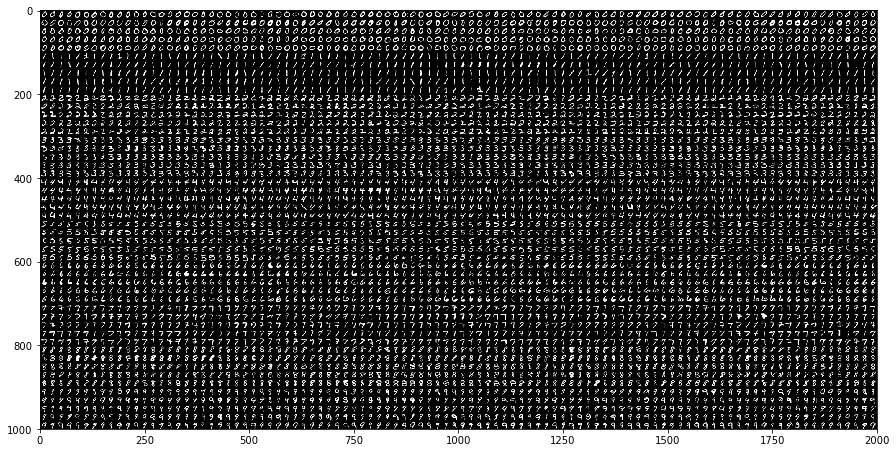

In [3]:
digits_img = cv2.imread('data/digits.png', cv2.IMREAD_GRAYSCALE)
print(type(digits_img))
print(digits_img.shape)
plt.figure(1, figsize=(15, 15))
plt.imshow(digits_img, cmap='gray')
plt.show()

จากภาพด้านบนมีขนาด ความสูง x ความกว้าง เท่ากับ 1,000 x 2,000 จุด ในแต่ละแถวมีตัวอย่างตัวเลขจำนวน 100 ตัว (100 คอลัมน์) มีจำนวนทั้งหมด 50 แถว โดยตัวอย่างตัวเลขแต่ละตัวมีขนาด 20 x 20 จุด ดังนั้นจำนวนตัวเลขตัวอย่างทั้งหมดคือ 100 x 50 = 5,000 ตัวอย่าง ในขั้นตอนถัดไปเราจะใช้ความสามารถของ numpy ในการตัดแบ่งขอมูลออกเป็น 5,000 ส่วน โดยแต่ละส่วนมีขนาดข้อมูล = 20 x 20 = 400 จุด

In [4]:
# ซอยข้อมูลออกเป็น 100 คอลัมน์ แต่ละคอลัมน์เก็บข้อมูล 50 แถว
data = [np.vsplit(row, 50) for row in np.hsplit(digits_img, 100)]
print(len(data))
print(type(data))
# ทำการปรับมิติของ list ให้เป็น numpy array โดยแต่ละหน่วยข้อมูลจำนวนจุด = 20 x 20 = 400 จุด เป็นจำนวนทั้งหมด 5,000 ตัวอย่าง
data = np.array(data).reshape(-1, 400)
print(type(data))
print('Total samples : %s' %len(data))
print('Data for each digit : %s' %len(data[0])) #แต่ละหน่วยข้อมูลจำนวนจุด = 20 x 20 = 400 จุด

100
<class 'list'>
<class 'numpy.ndarray'>
Total samples : 5000
Data for each digit : 400


In [5]:
rand_digit = data[randint(0, 4999)].reshape(20, 20)
print(rand_digit)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   9   2   0   0   0   0   1   9   6   0   0
    0   0]
 [  0   0   0   0   0   0 102 246 171 110 136 135 132 162 241 190  22   0
    0   0]
 [  0   0   0   0   0   4 166 255 236 239 255 255 255 255 255 185  13   0
    0   0]
 [  0   0   0   0   0  29 200 255 137  40 142 123  57 174 255 162   0   0
    0   0]
 [  0   0   0   0   7 166 255 226  43   0   0   0  28 221 255 116   0   0
    0   0]
 [  0   0   0   0   6 159 240 144   0   0   0  16 168 255 195  18   0   0
    0   0]
 [  0   0   0   0   0   8  38   7   0   0   0 105 255 255  74   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0  24 190 255 209  41   0

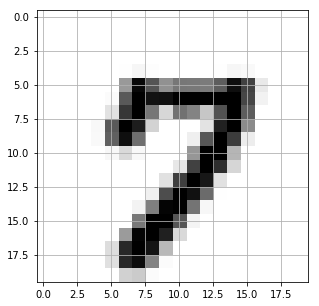

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(rand_digit, cmap=plt.cm.gray_r, interpolation='nearest')
plt.grid(True)
plt.show()

In [7]:
# make target from 99 columns, 4950 samples
target = np.tile(np.repeat(np.arange(10), 5), 99)
len(target)

4950

In [8]:
# Optional, make data & target as Sklearn Bunch
digits = datasets.base.Bunch(data=data, target=target)
print(type(digits))

<class 'sklearn.datasets.base.Bunch'>


In [9]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=3)
clf1.fit(data[:4950], target)
clf2 = neighbors.KNeighborsClassifier(n_neighbors=3)
clf2.fit(digits.data[:4950], digits.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
rand_digit1 = randint(0, 50) + 4949
clf1.predict(data[rand_digit1].reshape(1, -1))

array([3])

In [11]:
# Optional, Sklearn Bunch
rand_digit2 = randint(0, 50) + 4949
clf2.predict(digits.data[rand_digit2].reshape(1, -1))

array([1])

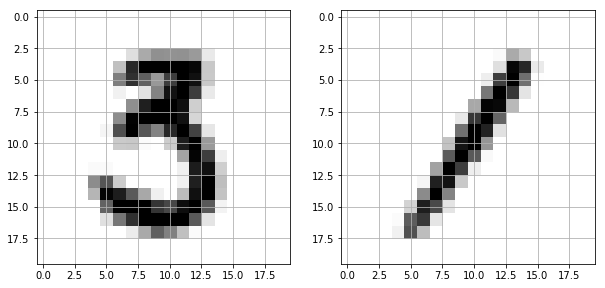

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121) # 1 row, 2 columns, order 1
plt.grid(True)
plt.imshow(data[rand_digit1].reshape(20, 20), cmap=plt.cm.gray_r, interpolation='nearest')
# Optional, Sklearn Bunch
plt.subplot(122) # 1 row, 2 columns, order 2
plt.grid(True)
plt.imshow(digits.data[rand_digit2].reshape(20, 20), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

มาเล่นอะไรสนุกๆกัน, ลองทดสอบด้วยลายมือของตัวผู้เขียนเองว่าได้ผลอย่างไร

<class 'numpy.ndarray'>
(480, 640, 3)


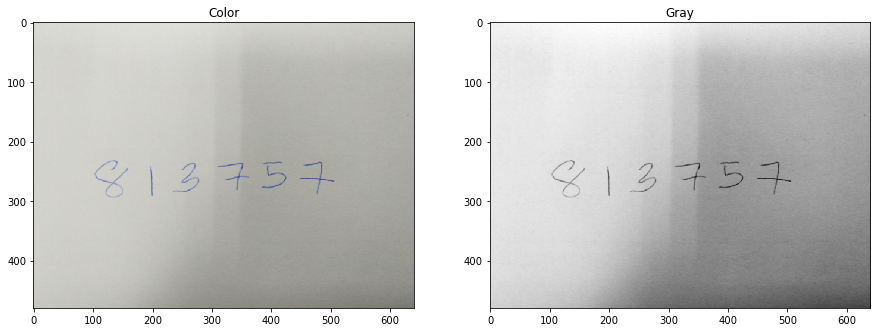

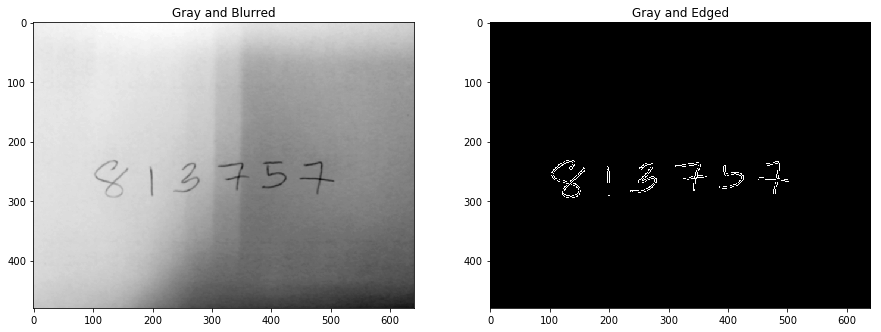

In [13]:
my_digits_img = cv2.imread('data/digits-my-handwriting.png')
my_digits_img = cv2.cvtColor(my_digits_img, cv2.COLOR_BGR2RGB)
my_digits_img_gray = cv2.cvtColor(my_digits_img, cv2.COLOR_BGR2GRAY)
my_digits_img_blurred = cv2.GaussianBlur(my_digits_img_gray, (5, 5), 0)
my_digits_img_edged = cv2.Canny(my_digits_img_blurred, 30, 150)
print(type(my_digits_img))
print(my_digits_img.shape)
plt.figure(1, figsize=(15, 10))
plt.subplot(121)
plt.title('Color')
plt.imshow(my_digits_img)
plt.subplot(122)
plt.title('Gray')
plt.imshow(my_digits_img_gray, cmap='gray')
plt.show()
plt.figure(1, figsize=(15, 10))
plt.subplot(121)
plt.title('Gray and Blurred')
plt.imshow(my_digits_img_blurred, cmap='gray')
plt.subplot(122)
plt.title('Gray and Edged')
plt.imshow(my_digits_img_edged, cmap='gray')
plt.show()

In [14]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
	# initialize the dimensions of the image to be resized and
	# grab the image size
	dim = None
	(h, w) = image.shape[:2]

	# if both the width and height are None, then return the
	# original image
	if width is None and height is None:
		return image

	# check to see if the width is None
	if width is None:
		# calculate the ratio of the height and construct the
		# dimensions
		r = height / float(h)
		dim = (int(w * r), height)

	# otherwise, the height is None
	else:
		# calculate the ratio of the width and construct the
		# dimensions
		r = width / float(w)
		dim = (width, int(h * r))

	# resize the image
	resized = cv2.resize(image, dim, interpolation = inter)

	# return the resized image
	return resized

def deskew(image, width):
	# grab the width and height of the image and compute
	# moments for the image
	(h, w) = image.shape[:2]
	moments = cv2.moments(image)
	
	# deskew the image by applying an affine transformation
	skew = moments["mu11"] / moments["mu02"]
	M = np.float32([
		[1, skew, -0.5 * w * skew],
		[0, 1, 0]])
	image = cv2.warpAffine(image, M, (w, h),
		flags = cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)

	# resize the image to have a constant width
	image = resize(image, width = width)
	
	# return the deskewed image
	return image

def center_extent(image, size):
	# grab the extent width and height
	(eW, eH) = size

	# handle when the width is greater than the height
	if image.shape[1] > image.shape[0]:
		image = resize(image, width = eW)

	# otherwise, the height is greater than the width
	else:
		image = resize(image, height = eH)

	# allocate memory for the extent of the image and
	# grab it
	extent = np.zeros((eH, eW), dtype = "uint8")
	offsetX = (eW - image.shape[1]) // 2
	offsetY = (eH - image.shape[0]) // 2
	extent[offsetY:offsetY + image.shape[0], offsetX:offsetX + image.shape[1]] = image

	# compute the center of mass of the image and then
	# move the center of mass to the center of the image
	(cY, cX) = np.round(mahotas.center_of_mass(extent)).astype("int32")
	(dX, dY) = ((size[0] // 2) - cX, (size[1] // 2) - cY)
	M = np.float32([[1, 0, dX], [0, 1, dY]])
	extent = cv2.warpAffine(extent, M, size)

	# return the extent of the image
	return extent

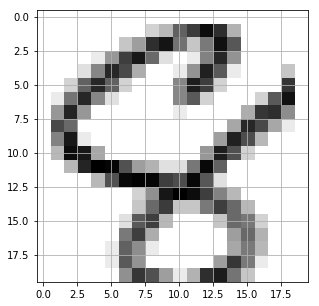

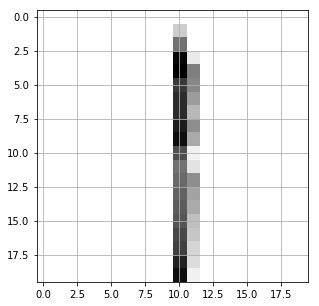

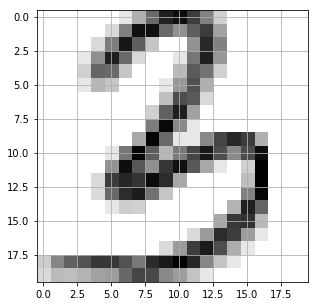

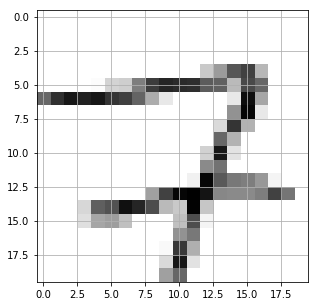

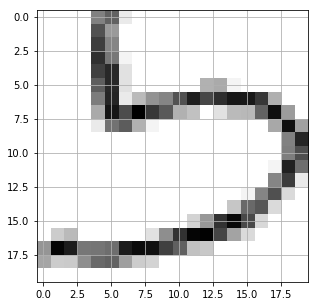

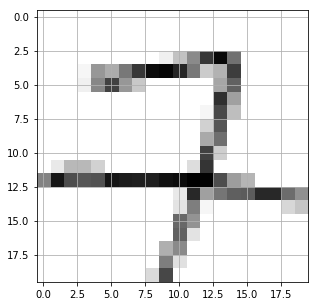

In [15]:
img = my_digits_img.copy()
(_, cnts, _) = cv2.findContours(my_digits_img_edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in cnts], key = lambda x: x[1])
for (c, _) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    if w >= 5 and h >= 15:  # make sure it is not too small for digit        
        roi = my_digits_img_gray[y:y + h, x:x + w]
        thresh = roi.copy()
        T = mahotas.thresholding.otsu(roi)        
        thresh[thresh > T] = 255        
        thresh = cv2.bitwise_not(thresh)
        thresh = deskew(thresh, 20)
        thresh = center_extent(thresh, (20, 20))
        thresh = cv2.equalizeHist(thresh)                
        predict_digit = clf1.predict(thresh.reshape(1, -1))
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.putText(img, str(predict_digit[0]), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
        #print(len(thresh.reshape(1, -1)[0]))
        plt.figure(figsize=(5, 5))
        plt.imshow(thresh, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.grid(True)
        plt.show()

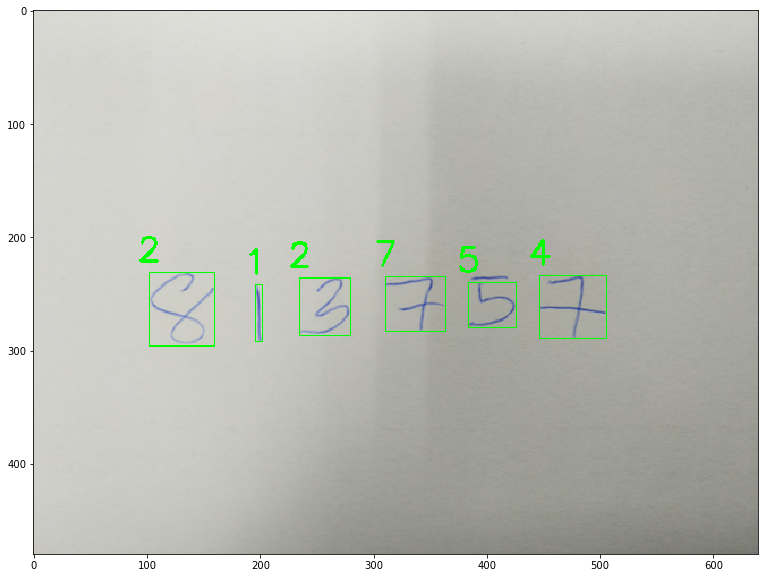

In [16]:
plt.figure(1, figsize=(15, 10))
plt.imshow(img)
plt.show()

ปรากฏว่าผิดเพียบ 555